<a href="https://colab.research.google.com/github/ddoneu/ECON3916-Statistical-Machine-Learning/blob/main/InClass%20notes/Dat_Do_In_class_note_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
np.random.randint(60,101)

100

In [3]:
grades = np.concatenate([np.random.randint(60,75,40),np.random.randint(75,85,100),np.random.randint(85,101,60)])
grades

array([ 74,  69,  66,  73,  68,  66,  65,  68,  63,  71,  63,  71,  64,
        62,  71,  68,  60,  63,  65,  74,  71,  71,  66,  74,  67,  74,
        74,  72,  66,  71,  65,  64,  69,  72,  68,  67,  74,  69,  70,
        70,  76,  75,  84,  78,  79,  83,  83,  84,  78,  80,  81,  83,
        78,  75,  80,  80,  82,  77,  80,  80,  83,  84,  75,  81,  76,
        83,  82,  84,  84,  80,  80,  81,  83,  84,  76,  80,  81,  79,
        81,  81,  78,  82,  77,  79,  79,  77,  75,  75,  80,  82,  79,
        78,  82,  84,  76,  78,  80,  79,  77,  80,  76,  80,  80,  76,
        79,  83,  77,  80,  83,  76,  80,  83,  81,  77,  78,  83,  77,
        75,  76,  84,  77,  81,  78,  84,  82,  82,  80,  76,  76,  80,
        80,  81,  77,  76,  78,  81,  81,  83,  83,  82,  86,  98, 100,
        99,  98,  91,  96,  85,  98,  85,  99,  95,  92,  90,  85,  85,
        94,  97,  90,  99,  87,  85,  93,  92,  98,  88,  93,  95,  85,
        93,  88,  92,  95,  85, 100,  87,  91,  95,  92,  93,  9

In [4]:
import pandas as pd

df = pd.DataFrame(grades,columns=['grades'])
pop_mean = df['grades'].mean()
print("Poplulation Mean:",pop_mean)
df.describe()

Poplulation Mean: 81.135


,grades
count,200.00000
mean,81.13500
std,9.05798
min,60.00000
25%,76.00000
50%,80.50000
75%,86.00000
max,100.00000


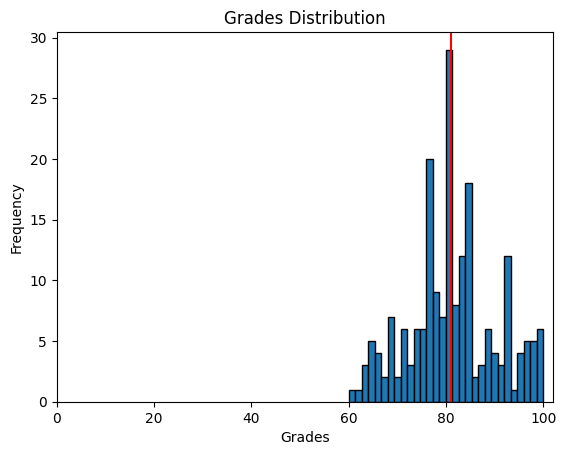

In [5]:
import matplotlib.pyplot as plt
plt.hist(df, bins = 30, edgecolor = 'k')
plt.axvline(pop_mean, color = 'red')
plt.title("Grades Distribution")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.xlim(xmin=0)
plt.show()

In [6]:
sample_3 = df['grades'].sample(n=3, replace = True)
print(sample_3)
print("Sample Mean:",sample_3.mean())
Sampling_error_3 = sample_3.mean() - pop_mean
print("Sampling Error:",Sampling_error_3)

68    84
63    81
14    71
Name: grades, dtype: int64
Sample Mean: 78.66666666666667
Sampling Error: -2.4683333333333337


In [7]:
biased_pool = df[df['grades'] > 80]

In [8]:
sample_biased_3 = biased_pool['grades'].sample(n=3, replace = True, weights=df['grades'] )
print(sample_biased_3)
print("Biased Sample Mean:",sample_biased_3.mean())
Sampling_error_biased_3 = sample_biased_3.mean() - pop_mean
print("Biased Sampling Error:",Sampling_error_biased_3)

161    85
72     83
198    88
Name: grades, dtype: int64
Biased Sample Mean: 85.33333333333333
Biased Sampling Error: 4.1983333333333235


In [9]:
sample_mean =[]

       grades_sample_mean
count         1000.000000
mean            81.154733
std              1.640865
min             76.433333
25%             79.966667
50%             81.200000
75%             82.233333
max             85.933333


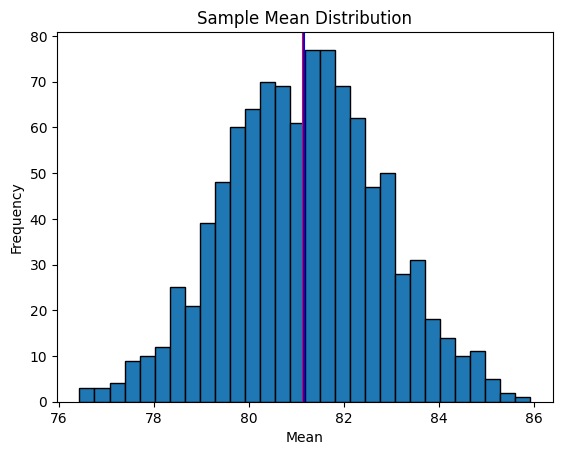

In [10]:
for i in range(1000):
  sample = df['grades'].sample(n=30, replace = True)
  sample_mean.append(sample.mean())

df_sample_mean = pd.DataFrame(sample_mean,columns=['grades_sample_mean'])

print("="*80)
print(df_sample_mean.describe())
print("="*80)
plt.hist(df_sample_mean['grades_sample_mean'], bins = 30, edgecolor = 'k')
plt.title("Sample Mean Distribution")
plt.axvline(pop_mean, color = 'red')
plt.axvline(df_sample_mean['grades_sample_mean'].mean(), color = 'blue')
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

# **With a known population mean and standard deviation.**

In [11]:
s_e_sample_30_1k = (df_sample_mean['grades_sample_mean'].std() / np.sqrt(1000))
print(s_e_sample_30_1k)

0.05188869529021852


In [12]:
m_e = 1.96 * s_e_sample_30_1k
m_e

np.float64(0.1017018427688283)

In [13]:
upper_bound = df_sample_mean['grades_sample_mean'].mean() + 1.96*s_e_sample_30_1k
upper_bound

np.float64(81.25643517610217)

In [14]:
lower_bound = df_sample_mean['grades_sample_mean'].mean() - 1.96*s_e_sample_30_1k
lower_bound

np.float64(81.0530314905645)

In [15]:
C_I_95 = [f"{lower_bound:.2f}",f"{upper_bound:.2f}"]
print(C_I_95)

['81.05', '81.26']


In [23]:
import scipy.stats as stats
ci = stats.norm.interval(confidence=0.95, loc=df_sample_mean['grades_sample_mean'].mean(), scale=s_e_sample_30_1k)
print(ci)

(np.float64(81.05303335935974), np.float64(81.25643330730693))


# **Sample of n = 30 (with 1000 study)**

In [24]:
df_sample_mean.describe()

,grades_sample_mean
count,1000.000000
mean,81.154733
std,1.640865
min,76.433333
25%,79.966667
50%,81.200000
75%,82.233333
max,85.933333


In [27]:
z_score = (df_sample_mean['grades_sample_mean'].mean() - pop_mean) / (df_sample_mean['grades_sample_mean'].std() / np.sqrt(1000))
print(z_score)

p_value = stats.norm.sf(abs(z_score))*2
print(p_value)


0.38030120478004426
0.7037218413049963


# **With an sample mean and standard deviation(t-distribution).**